In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#%%
########################################################
######## X-MAC: Trade_off Energy with Delay using GT
########################################################
# Radio subsystem varaible definition

P     = 32.            # Payload [byte]
R     = 31.25          # CC2420 Radio Rate [kbyte/s = Byte/ms]
D     = 8              # number of levels
C     = 5              # neighbors size (connectivity)
N     = C*D**2         # number of nodes
#### BE CAREFUL:  Times are in milliseconds (ms)
Lmax  = 5000.          # Maximal allowed Delay (ms)
Emax  = 1.             # MAximal Energy Budjet (J)

L_pbl = 4.             # preamble length [byte]
L_hdr = 9. + L_pbl     # header length [byte]
L_ack = 9. + L_pbl     # ACK length [byte]
L_ps  = 5. + L_pbl     # preamble strobe length [byte]

Tal  = 0.95            # ack listen period [ms]
Thdr = L_hdr/R         # header transmission duration [ms]
Tack = L_ack/R         # ACK transmission duration [ms]
Tps  = L_ps/R          # preamble strobe transmission duration [ms]
Tcw  = 15*0.62         # Contention window size [ms]
Tcs  = 2.60            # Time [ms] to turn the radio into TX and probe the channel (carrier sense)
Tdata = Thdr + P/R + Tack # data packet transmission duration [ms]

### Sampling frequency
Fs   = 1.0/(60*30*1000)    # e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms

# Sleep period: Parameter Bounds
Tw_max  = 500.       # Maximum Duration of Tw in ms
Tw_min  = 100.       # Minimum Duration of Tw in ms

## Part 1

1.6666666666666667e-05
3.5526643455999998 0.0005333333333333334 0.010170400000000003 4.0 52.048
3.3333333333333333e-06
3.55053286912 0.00010666666666666667 0.00203408 4.0 52.048
1.6666666666666667e-06
3.5502664345599997 5.333333333333333e-05 0.00101704 4.0 52.048
1.111111111111111e-06
3.5501776230399997 3.555555555555555e-05 0.0006780266666666667 4.0 52.048
8.333333333333333e-07
3.55013321728 2.6666666666666667e-05 0.00050852 4.0 52.048
6.666666666666667e-07
3.550106573824 2.1333333333333335e-05 0.00040681600000000006 4.0 52.048
5.555555555555555e-07
3.5500888115199998 1.7777777777777777e-05 0.00033901333333333336 4.0 52.048


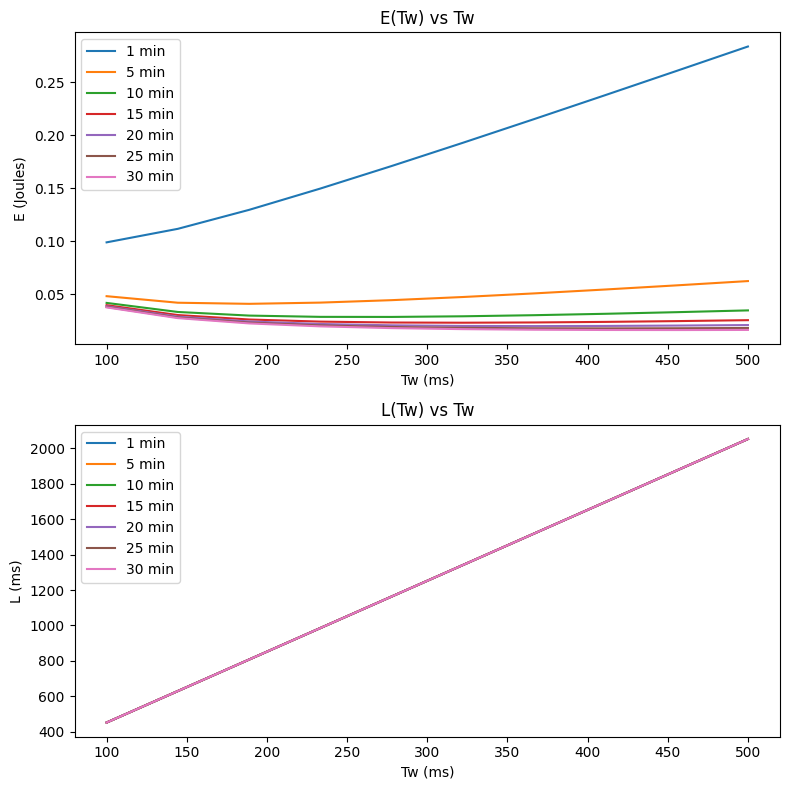

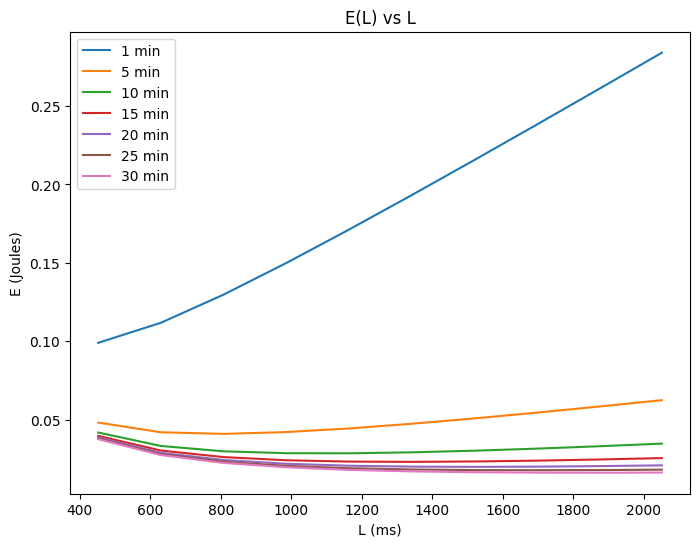

In [3]:
intervals= [1,5,10,15,20,25,30] #in minutes
data={}

for i in intervals:
    
    Fs = 1.0/(60*i*1000) #e.g. Min traffic rate 1 pkt/half_hour = 1/(60*30*1000) pk/ms
    print(Fs)
    F_I_worst = Fs * ((D**2)-1)
    F_out_worst = Fs * (D**2)
    F_B_worst = (C-3) * F_out_worst

    alpha1 = Tcs + Tal + (3/2)*Tps * (((Tps+Tal)/2)+Tack+Tdata) * F_B_worst
    alpha2 = F_out_worst/2
    alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

    beta1 = D/2
    beta2 = D * ((Tcw/2) + Tdata)

    E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
    L = lambda T_w : beta1 * T_w + beta2

    print(alpha1, alpha2, alpha3, beta1, beta2)
    Es = []
    Ls = []
    Tws = []
    for Tw in np.linspace(Tw_min, Tw_max, 10):
        Tws.append(Tw)
        Es.append(E(Tw))
        Ls.append(L(Tw))
    data[i]= {'Tws':Tws, 'Es':Es, 'Ls':Ls}
    
# Plot E(Tw) and L(Tw) as a function of Tw
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
for i in intervals:
    ax[0].plot(data[i]['Tws'], data[i]['Es'], label=f"{i} min")
    ax[1].plot(data[i]['Tws'], data[i]['Ls'], label=f"{i} min")
ax[0].set_xlabel("Tw (ms)")
ax[0].set_ylabel("E (Joules)")
ax[0].set_title("E(Tw) vs Tw")
ax[0].legend()
ax[1].set_xlabel("Tw (ms)")
ax[1].set_ylabel("L (ms)")
ax[1].set_title("L(Tw) vs Tw")
ax[1].legend()
plt.tight_layout()
plt.show()

# Plot E(L) as a function of L
fig, ax = plt.subplots(figsize=(8, 6))
for i in intervals:
    L_vals = np.array(data[i]['Ls'])
    E_vals = np.array(data[i]['Es'])
    ax.plot(L_vals, E_vals, label=f"{i} min")
ax.set_xlabel("L (ms)")
ax.set_ylabel("E (Joules)")
ax.set_title("E(L) vs L")
ax.legend()
plt.show()

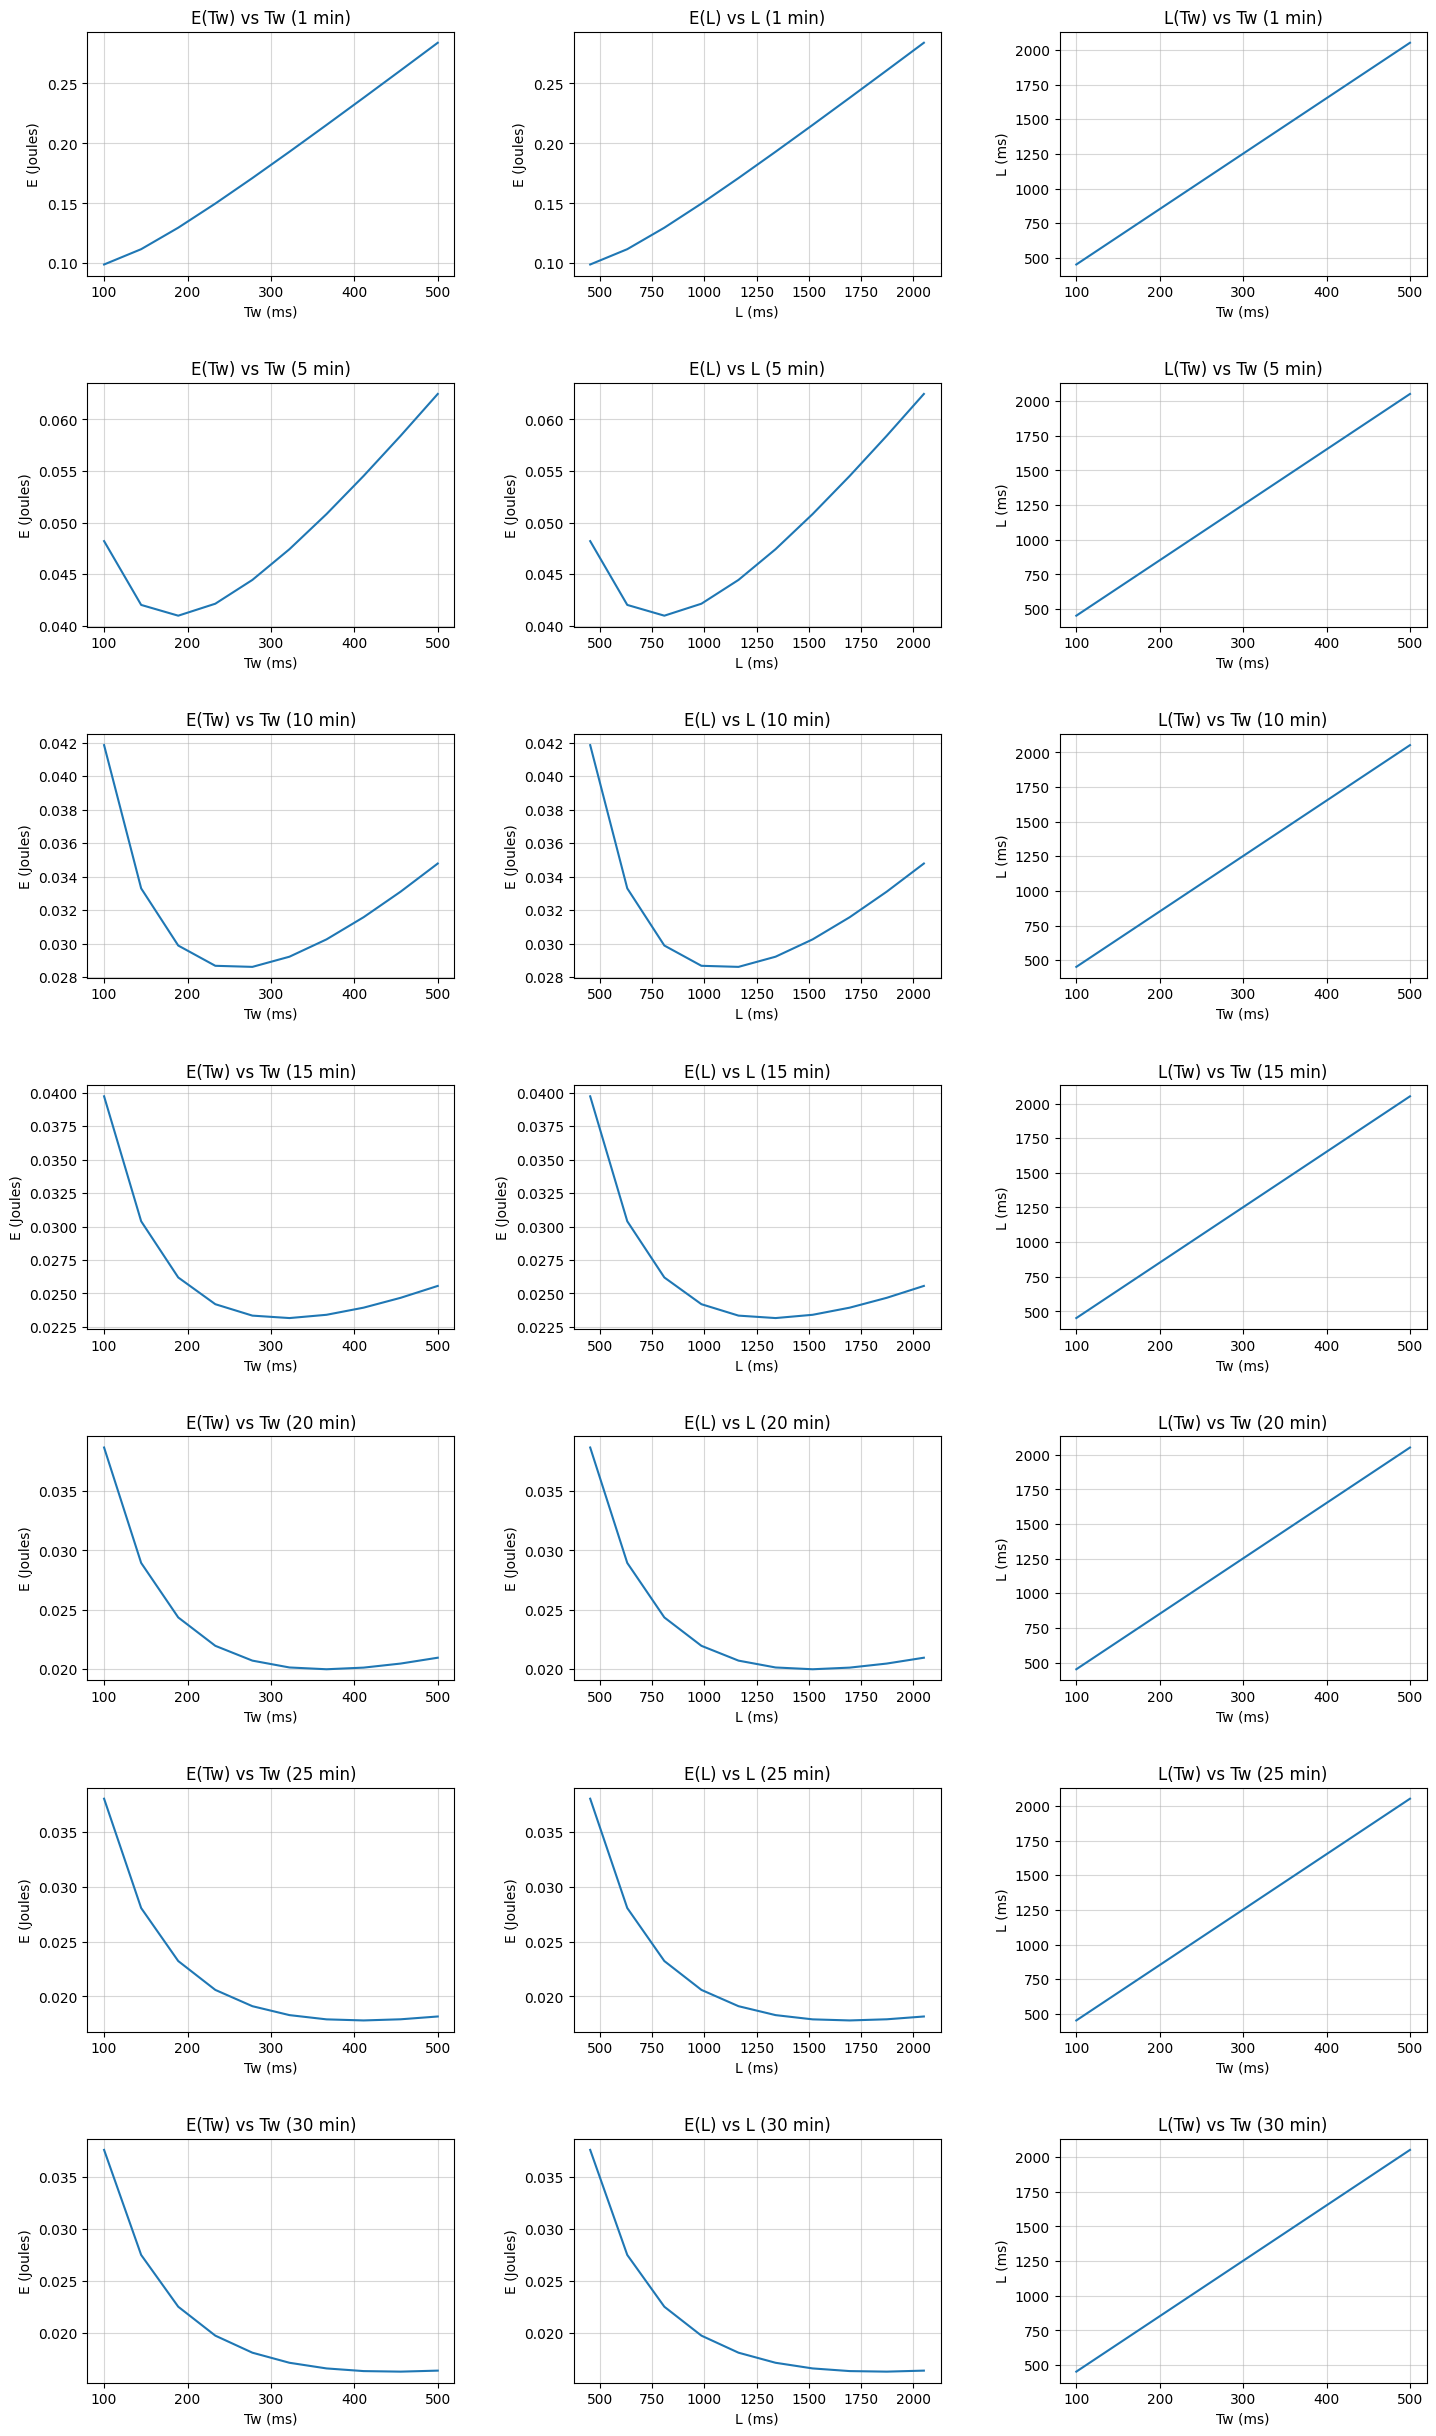

In [4]:
# Create a 7x3 grid of subplots
fig, axs = plt.subplots(7, 3, figsize=(15, 25))

# Plot E(Tw) as a function of Tw in the first column
for i, interval in enumerate(intervals):
    axs[i, 0].plot(data[interval]['Tws'], data[interval]['Es'])
    axs[i, 0].set_xlabel("Tw (ms)")
    axs[i, 0].set_ylabel("E (Joules)")
    axs[i, 0].set_title(f"E(Tw) vs Tw ({interval} min)")
    axs[i, 0].grid(which='both', alpha=0.5)

# Plot E(L) as a function of L in the second column
for i, interval in enumerate(intervals):
    L_vals = np.array(data[interval]['Ls'])
    E_vals = np.array(data[interval]['Es'])
    axs[i, 1].plot(L_vals, E_vals)
    axs[i, 1].set_xlabel("L (ms)")
    axs[i, 1].set_ylabel("E (Joules)")
    axs[i, 1].set_title(f"E(L) vs L ({interval} min)")
    axs[i, 1].grid(which='both', alpha=0.5)
    
# Plot L(Tw) as a function of Tw in the third column
for i, interval in enumerate(intervals):
    axs[i, 2].plot(data[interval]['Tws'], data[interval]['Ls'])
    axs[i, 2].set_xlabel("Tw (ms)")
    axs[i, 2].set_ylabel("L (ms)")
    axs[i, 2].set_title(f"L(Tw) vs Tw ({interval} min)")
    axs[i, 2].grid(which='both', alpha=0.5)


# Adjust subplots spacing and layout
fig.tight_layout(pad=3.0)

# Show the plot
plt.show()

# Part 2

In [5]:
from gpkit import Variable, Model
import numpy as np
import pandas as pd

## Problem 1

We can use, as suggested, 30 minutes
Calulate the alphas for d=1 and d=D

### Vary $L_{max}$

In [6]:
results = []
for minutes in [5,10,15,20,25,30]:
    Fs   = 1.0/(60*minutes*1000)    # every n minutes
    F_I_worst = Fs * ((D**2)-1)
    F_out_worst = Fs * (D**2)
    F_B_worst = (C-3) * F_out_worst

    alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
    alpha2 = F_out_worst/2
    alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

    beta1 = D/2
    beta2 = D * ((Tcw/2) + Tdata)

    E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
    L = lambda T_w : beta1 * T_w + beta2

    for l_max in np.linspace(500, 3000, num=50):
        Tw = Variable('Tw')
        E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
        obj = E_xmac
        l_xmac = beta1 * Tw + beta2

        Ttx = Tw /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata
        I_0 = C
        Etx_1 = (Tcs + Tal + Ttx) * F_out_worst
        constraints = [
            l_xmac <= l_max,
            Tw >= Tw_min,
            I_0 * Etx_1 <= 1/4,   
        ]
        prob = Model(obj, constraints)
        result = prob.solve(verbosity=0)
        E_best = result['cost']
        L_worst = beta1 * result["variables"]["Tw"] + beta2
        Tw_opt = result['variables']['Tw']

        results.append({
            'interval': minutes,
            'L_max': l_max,
            'E_best': E_best,
            'L_worst': L_worst,
            'Tw_opt': Tw_opt
        })

In [7]:
df = pd.DataFrame(results)
df

,interval,L_max,E_best,L_worst,Tw_opt
0,5,500.000000,0.045684,499.999998,111.988000
1,5,551.020408,0.043803,551.020250,124.743063
2,5,602.040816,0.042523,602.040677,137.498169
3,5,653.061224,0.041691,653.061059,150.253265
4,5,704.081633,0.041203,704.081357,163.008339
...,...,...,...,...,...
295,30,2795.918367,0.016228,1839.526393,446.869598
296,30,2846.938776,0.016228,1839.526645,446.869661
297,30,2897.959184,0.016228,1839.526636,446.869659
298,30,2948.979592,0.016228,1839.523690,446.868923


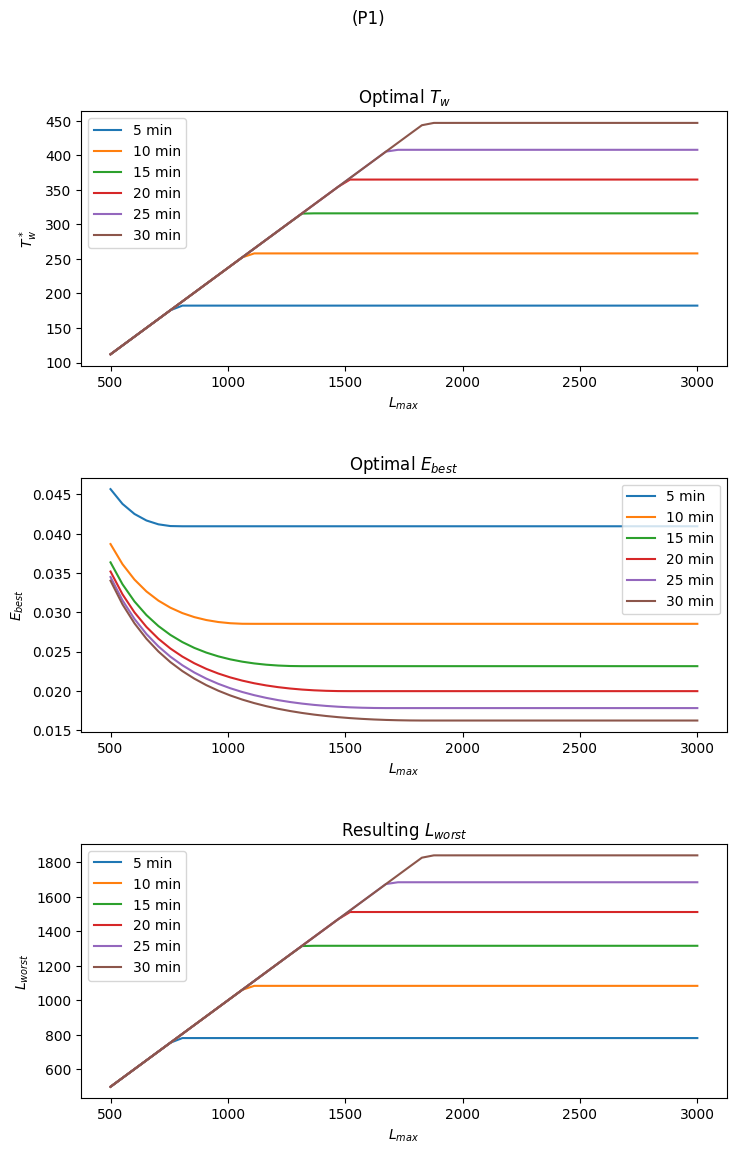

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(8, 4*3))
fig.suptitle(f'(P1)')

axs[0].set_xlabel("$L_{max}$")
axs[0].set_ylabel('$T_w^*$')
for minutes in [5,10,15,20,25,30]:
    axs[0].plot(df[df.interval == minutes].L_max, df[df.interval == minutes].Tw_opt, label=f'{minutes} min')
axs[0].legend()
axs[0].set_title('Optimal $T_w$')

axs[1].set_xlabel("$L_{max}$")
axs[1].set_ylabel('$E_{best}$')
for minutes in [5,10,15,20,25,30]:
    axs[1].plot(df[df.interval == minutes].L_max, df[df.interval == minutes].E_best, label=f'{minutes} min')
axs[1].legend()
axs[1].set_title('Optimal $E_{best}$')

axs[2].set_xlabel("$L_{max}$")
axs[2].set_ylabel('$L_{worst}$')
for minutes in [5,10,15,20,25,30]:
    axs[2].plot(df[df.interval == minutes].L_max, df[df.interval == minutes].L_worst, label=f'{minutes} min')
axs[2].legend()
axs[2].set_title('Resulting $L_{worst}$')

fig.tight_layout(pad=3.0)
# plt.show()
plt.savefig(f'p1.png')

### Specific example

We need some values for the the exercise 3.

## Problem 2

### Vary $E_{budget}$

In [9]:
results = []
# p2_intervals = [15,20,25,30]
p2_intervals = [30]
for minutes in p2_intervals:
    Fs   = 1.0/(60*minutes*1000)    # every n minutes
    F_I_worst = Fs * ((D**2)-1)
    F_out_worst = Fs * (D**2)
    F_B_worst = (C-3) * F_out_worst

    alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
    alpha2 = F_out_worst/2
    alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

    beta1 = D/2
    beta2 = D * ((Tcw/2) + Tdata)

    E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
    L = lambda T_w : beta1 * T_w + beta2

    # for E_budget in [0.035]:
    for E_budget in np.linspace(0.02, 0.35, num=50):
        Tw = Variable('Tw')
        l_xmac = beta1 * Tw + beta2
        obj = l_xmac

        E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
        
        constraints = [
            E_xmac <= E_budget,
            Tw >= Tw_min,
            I_0 * Etx_1 <= 1/4,   
        ]

        prob = Model(obj, constraints)
        result = prob.solve(verbosity=0)

        L_best = result['cost']
        E_worst = alpha1 / result["variables"]["Tw"] + alpha2 * result["variables"]["Tw"] + alpha3
        Tw_opt = result['variables']['Tw']

        results.append({
            'interval': minutes,
            'E_budget': E_budget,
            'L_best': L_best,
            'E_worst': E_worst,
            'Tw_opt': Tw_opt
        })

In [10]:
df = pd.DataFrame(results)
df

,interval,E_budget,L_best,E_worst,Tw_opt
0,30,0.020000,961.123839,0.020000,227.268960
1,30,0.026735,650.289441,0.026735,149.560361
2,30,0.033469,508.634899,0.033469,114.146728
3,30,0.040204,452.048000,0.037618,100.000000
4,30,0.046939,452.047985,0.037618,100.000000
5,30,0.053673,452.047951,0.037618,99.999996
6,30,0.060408,452.047999,0.037618,100.000000
7,30,0.067143,452.047998,0.037618,100.000000
8,30,0.073878,452.047998,0.037618,100.000000
9,30,0.080612,452.047997,0.037618,100.000000


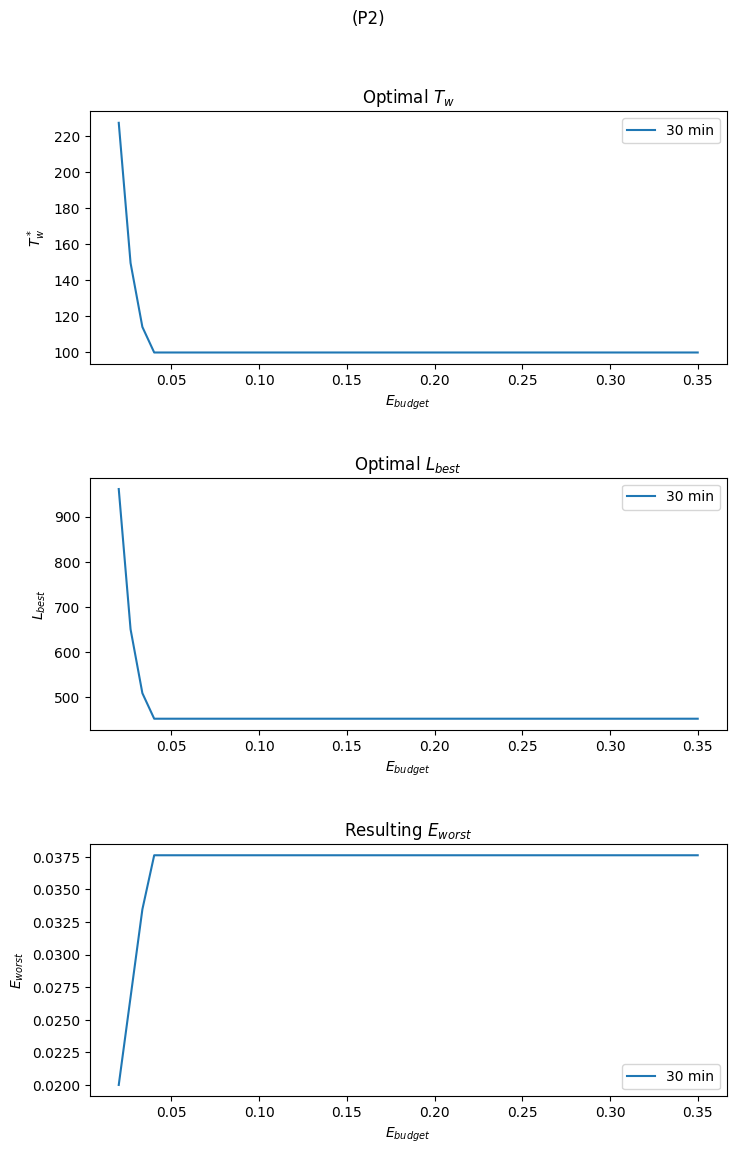

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(8, 4*3))
fig.suptitle(f'(P2)')

axs[0].set_xlabel("$E_{budget}$")
axs[0].set_ylabel('$T_w^*$')
axs[0].ticklabel_format(useOffset=False)
for minutes in p2_intervals:
    axs[0].plot(df[df.interval == minutes].E_budget, df[df.interval == minutes].Tw_opt, label=f'{minutes} min')
axs[0].legend()
axs[0].set_title('Optimal $T_w$')

axs[1].set_xlabel("$E_{budget}$")
axs[1].set_ylabel('$L_{best}$')
axs[1].ticklabel_format(useOffset=False)
for minutes in p2_intervals:
    axs[1].plot(df[df.interval == minutes].E_budget, df[df.interval == minutes].L_best, label=f'{minutes} min')
axs[1].legend()
axs[1].set_title('Optimal $L_{best}$')

axs[2].set_xlabel("$E_{budget}$")
axs[2].set_ylabel('$E_{worst}$')
axs[2].ticklabel_format(useOffset=False)
for minutes in p2_intervals:
    axs[2].plot(df[df.interval == minutes].E_budget, df[df.interval == minutes].E_worst, label=f'{minutes} min')
axs[2].legend()
axs[2].set_title('Resulting $E_{worst}$')

fig.tight_layout(pad=3.0)
# plt.show()
plt.savefig(f'p2.png')

## Part 3

Nash Barganians solution


In [12]:
minutes = 30
Fs   = 1.0/(60*minutes*1000)    # every 30 minutes
Fs
F_I_worst = Fs * ((D**2)-1)
F_out_worst = Fs * (D**2)
F_B_worst = (C-3) * F_out_worst

alpha1 = Tcs + Tal + (3/2)*Tps * ((Tps+Tal)/2+Tack+Tdata) * F_B_worst
alpha2 = F_out_worst/2
alpha3 = (((Tps+Tal)/2)+Tcs+Tal+Tack+Tdata)*F_out_worst + ((3/2)*Tps + Tack + Tdata) * F_I_worst + (3/4) * Tps * F_B_worst

beta1 = D/2
beta2 = D * ((Tcw/2) + Tdata)

E = lambda T_w : alpha1/T_w + alpha2 * T_w + alpha3
L = lambda T_w : beta1 * T_w + beta2

### Problem 1

In [13]:
Tw = Variable('Tw')
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
obj = E_xmac
l_xmac = beta1 * Tw + beta2
# [100, 5000]
l_max = 1600
Ttx = Tw /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata
I_0 = C
Etx_1 = (Tcs + Tal + Ttx) * F_out_worst
constraints = [
    l_xmac <= l_max,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]
prob = Model(obj, constraints)
result = prob.solve()
E_best = result['cost']
L_worst = beta1 * result["variables"]["Tw"] + beta2

result

Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.00796 seconds.


{'cost': 0.016392440718962276,
 'cost function': gpkit.Posynomial(3.55/Tw + 1.78e-05·Tw + 0.000339),
 'freevariables': {Tw: 386.9879469224875},
 'constants': {},
 'variables': {Tw: 386.9879469224875},
 'soltime': 0.007962942123413086,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(4·Tw + 52 ≤ 1.6e+03): 0.1399337751524286,
   gpkit.PosynomialInequality(Tw ≥ 100): 1.2818022409870801e-11,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 2.3442103597919565e-11},
  'models': {'': 0.13993377518868874},
  'cost': {Tw: -0.13993377248275207},
  'variables': {Tw: 2.68030061658201e-09},
  'variablerisk': {Tw: 0.2798675476714408},
  'constants': {Tw: 2.68030061658201e-09}},
 'warnings': {'Solution Inconsistency': []}}

### Problem 2

In [14]:
l_xmac = beta1 * Tw + beta2
obj = l_xmac
E_xmac = alpha1 / Tw + alpha2 * Tw + alpha3
# [0.05, 0.5]
E_budget = 0.035
constraints = [
    E_xmac <= E_budget,
    Tw >= Tw_min,
    I_0 * Etx_1 <= 1/4,   
]
prob = Model(obj, constraints)
result = prob.solve()

L_best = result['cost']
E_worst = alpha1 / result["variables"]["Tw"] + alpha2 * result["variables"]["Tw"] + alpha3
result

Using solver 'cvxopt'
 for 1 free variables
  in 4 posynomial inequalities.
Solving took 0.0073 seconds.


{'cost': 485.87348722065053,
 'cost function': gpkit.Posynomial(4·Tw + 52),
 'freevariables': {Tw: 108.45637371627434},
 'constants': {},
 'variables': {Tw: 108.45637371627434},
 'soltime': 0.007304668426513672,
 'sensitivities': {'constraints': {gpkit.PosynomialInequality(3.55/Tw + 1.78e-05·Tw + 0.000339 ≤ 0.035): 1.0046503657793797,
   gpkit.PosynomialInequality(Tw ≥ 100): 1.224726035552412e-09,
   gpkit.PosynomialInequality(5·(3.55 + Tw/1.24·0.619 + 0.416 + 1.86)·3.56e-05 ≤ 0.25): 8.204411971144645e-10},
  'models': {'': 1.004650367824547},
  'cost': {Tw: 0.8928774659452228},
  'variables': {Tw: 1.1899955676910449e-08},
  'variablerisk': {Tw: 1.7857549216313724},
  'constants': {Tw: 1.1899955676910449e-08}},
 'warnings': {'Solution Inconsistency': []}}

### Nash

In [15]:
from scipy.optimize import minimize

In [16]:
E_worst, L_worst

(0.035000000608515276, 1599.99978768995)

In [17]:
# variables E_1, L_1, T_w
# maximize f -> minimize -f
fun = lambda x: - np.log(E_worst - x[0]) - np.log(L_worst - x[1]) 

In [18]:
def cond(x):
    E_1, L_1, T_w = x
    Ttx = T_w /(Tps + Tal) * ((Tps + Tal)/2) + Tack + Tdata
    Etx_1 = (Tcs + Tal + Ttx) * F_out_worst
    return -(I_0 * Etx_1 - 1/4)

In [19]:
cons = (
    # E_1, L_1, T_w
        {'type': 'ineq', 'fun': lambda x: -(alpha1 / x[2] + alpha2 * x[2] + alpha3 - E_worst)},
        {'type': 'ineq', 'fun': lambda x: -(alpha1 / x[2] + alpha2 * x[2] + alpha3 - x[0])},

        {'type': 'ineq', 'fun': lambda x: -(beta1 * x[2] + beta2 - L_worst)},
        {'type': 'ineq', 'fun': lambda x: -(beta1 * x[2] + beta2 - x[1])},

        {'type': 'ineq', 'fun': lambda x: -(Tw_min - x[2])},
        
        {'type': 'ineq', 'fun': cond},
)

In [20]:
x0 = [E_best,L_best,250]
results=minimize(fun, x0, method='SLSQP', constraints=cons, bounds=((0, Emax), (0, Lmax), (Tw_min, Tw_max)))
E_opt, L_opt, Tw_opt=results.x
results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -2.3014778104614546
       x: [ 2.166e-02  8.510e+02  1.997e+02]
     nit: 22
     jac: [ 7.498e+01  1.335e-03  0.000e+00]
    nfev: 96
    njev: 22

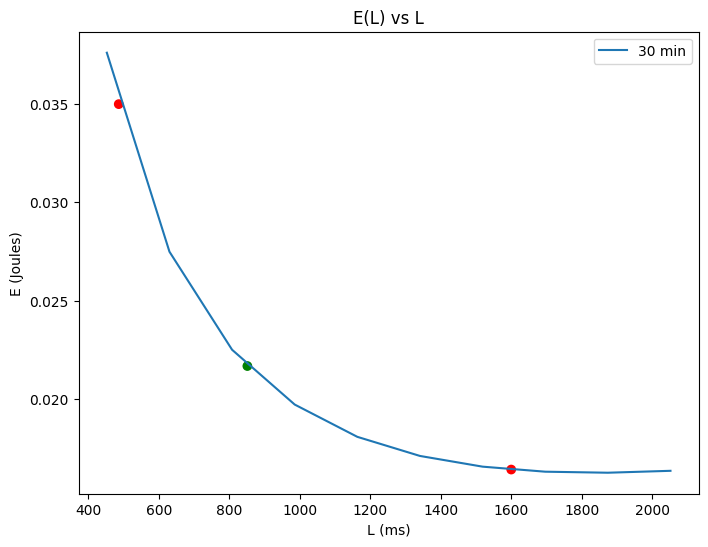

In [21]:
# Plot E(L) as a function of L
fig, ax = plt.subplots(figsize=(8, 6))
L_vals = np.array(data[30]['Ls'])
E_vals = np.array(data[30]['Es'])
ax.plot(L_vals, E_vals, label=f"{30} min")
ax.set_xlabel("L (ms)")
ax.set_ylabel("E (Joules)")
ax.set_title("E(L) vs L")
ax.legend()
ax.scatter([L_best, L_opt, L_worst], [E_worst, E_opt, E_best], color=['red', 'green', 'red'])
plt.show()